This file helps reproduce figure (3) in the paper.

In [1]:
import re
import pickle
import matplotlib.pyplot as plt
import numpy as np
import argparse

import random
import string

from tqdm import tqdm

from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction

from typing import Callable, List

In [2]:
smoothing = SmoothingFunction() # use NLTK's smoothing functionality

In [3]:
def create_random_token(): # a random pad token to insert into locations of various ngrams
    N = 7
    res = ''.join(random.choices(string.ascii_uppercase +
                             string.digits, k = N)) 

    return res

This function returns a list of tuples of (ngram, frequency_of_ngram) for the ngram_size specified. We replace these common ngrams with random pad tokens and calculate BLEUs for the dropoff plots.

In [4]:
def get_ngram_list(corpus_file_path: str, ngram_size: int):
  ngram_dict_code = {}
  with open(corpus_file_path) as f_1:
    line = f_1.readline()
    code_ngram_count = 0
    while line:
        line = line.split(" ")
        n_prev_tokens = []
        for token in line:
            if token == "\n":
                break

            n_prev_tokens.append(token)
            if len(n_prev_tokens) < ngram_size:
                continue

            code_ngram_count+=1
            ngram = "-".join(n_prev_tokens)
            
            if ngram not in ngram_dict_code:
                ngram_dict_code[ngram] = 1
            else:
                ngram_dict_code[ngram]+=1
            del n_prev_tokens[0]
        line = f_1.readline()
  
  sorted_list_code = sorted(ngram_dict_code.items(), key=lambda item: item[1], reverse=True)
  return sorted_list_code


The following function takes as input a line of text, a list of tokens (ngrams to remove), and an ngram_size. The function return an updated line with the removable tokens removed and replaced with a random pad token.

In [5]:
def remove_ngrams_from_line(input_line: str, list_of_removable_ngrams: List[str], ngram_size: int) -> str:
    input_line_split = input_line.split(" ")
    new_input_line = []
    n_prev_tokens = [] # list of n previous tokens

    for token in input_line_split:

        n_prev_tokens.append(token)
        new_input_line.append(token)

        if len(n_prev_tokens) < ngram_size:
          continue
        else:
          cur_ngram = "-".join(n_prev_tokens)

        if cur_ngram in list_of_removable_ngrams:
            for i in range(1, ngram_size+1): # the current token has already been appended
              new_input_line[-i] = create_random_token()

        del n_prev_tokens[0]

    return new_input_line

The function `compute_and_plot` has five parameters:

*   `file_path` -> the location of the .txt file
*   `ngram_size` -> an integer representing the size of the ngram. e.g. ngram_size = 3 represents a trigram
*   `pickle_file_path` -> the location to store the plotting data in a pickle file
*   `num_iters` -> number of tokens (ngrams) to remove




In [9]:
def calc(num_iters, file_path, sorted_list, ngram_size):
    output_list = []
    for i in tqdm(range(num_iters)):
        in_f1 = open(file_path, "r")
        in_f2 = open(file_path, "r")
        list_of_removable_ngrams = [tuple_link[0] for tuple_link in sorted_list[0:i]]
        line1 = in_f1.readline()
        line2 = in_f2.readline()
        total_bleu = 0
        cnt = 0
        while line1:
            line1 = remove_ngrams_from_line(line1, list_of_removable_ngrams, ngram_size)
            sentence_bleu_score = sentence_bleu([line2.split(" ")], line1, 
                                                weights=(0.25,0.25,0.25,0.25), 
                                                smoothing_function=smoothing.method2)
            total_bleu = total_bleu + sentence_bleu_score
            line1 = in_f1.readline()
            line2 = in_f2.readline()
            cnt = cnt + 1

        bleu_score = total_bleu / cnt
        output_list.append(bleu_score)
    return output_list

In [11]:
def compute_and_plot(file_path: str, file_path2, file_path3, file_path4, file_path5, file_path6, file_path7, file_path8,
                     ngram_size: int, 
                     pickle_file_path: str, pickle_file_path2, pickle_file_path3, pickle_file_path4, pickle_file_path5, pickle_file_path6, pickle_file_path7, pickle_file_path8,
                     num_iters: int=100):
    indices = [i for i in range(num_iters)]
    
    sorted_list = get_ngram_list(file_path, ngram_size)
    output_list = calc(num_iters, file_path, sorted_list, ngram_size)
    pickle.dump(output_list, open(pickle_file_path, "wb"))
    
    sorted_list2 = get_ngram_list(file_path2, ngram_size)
    output_list2 = calc(num_iters, file_path2, sorted_list2, ngram_size)
    pickle.dump(output_list2, open(pickle_file_path2, "wb"))
    
    sorted_list3 = get_ngram_list(file_path3, ngram_size)
    output_list3 = calc(num_iters, file_path3, sorted_list3, ngram_size)
    pickle.dump(output_list3, open(pickle_file_path3, "wb"))
    
    sorted_list4 = get_ngram_list(file_path4, ngram_size)
    output_list4 = calc(num_iters, file_path4, sorted_list4, ngram_size)
    pickle.dump(output_list4, open(pickle_file_path4, "wb"))
    
    sorted_list5 = get_ngram_list(file_path5, ngram_size)
    output_list5 = calc(num_iters, file_path5, sorted_list5, ngram_size)
    pickle.dump(output_list5, open(pickle_file_path5, "wb"))
    
    sorted_list6 = get_ngram_list(file_path6, ngram_size)
    output_list6 = calc(num_iters, file_path6, sorted_list6, ngram_size)
    pickle.dump(output_list6, open(pickle_file_path6, "wb"))
    
    sorted_list7 = get_ngram_list(file_path7, ngram_size)
    output_list7 = calc(num_iters, file_path7, sorted_list7, ngram_size)
    pickle.dump(output_list7, open(pickle_file_path7, "wb"))
    
    sorted_list8 = get_ngram_list(file_path8, ngram_size)
    output_list8 = calc(num_iters, file_path8, sorted_list8, ngram_size)
    pickle.dump(output_list8, open(pickle_file_path8, "wb"))

    plt.title("BLEU-4 Dropoff Scores")
    plt.xlabel("Number of most common ngrams stripped")
    plt.ylabel("BLEU-4 score")
    plt.plot(indices, output_list, linewidth=2, color='r')
    plt.plot(indices, output_list2, linewidth=2, color='b')
    plt.plot(indices, output_list3, linewidth=2, color='y')
    plt.plot(indices, output_list4, linewidth=2, color='k')
    plt.plot(indices, output_list6, linewidth=2, color='gray')
    plt.plot(indices, output_list7, linewidth=2, color='g')
    plt.plot(indices, output_list8, linewidth=2, color='c')
    plt.show()

Here, we have four changeable parameters:

*   `num_iters`
*   `n_gram`
*   `file_path`
*   `pickle_file_path`

These details of these parameters covered above.

100%|█████████████████████████████████████████| 100/100 [00:46<00:00,  2.13it/s]


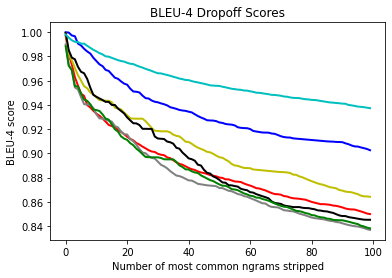

In [13]:
# changeable parameters
file_path1 = "../../data/plot-data/univariate/CodeNN_comments.txt"
file_path2 = "../../data/plot-data/univariate/DeepCom1_comments.txt"
file_path3 = "../../data/plot-data/univariate/DeepCom2_comments.txt"
file_path4 = "../../data/plot-data/univariate/Docstring1_comments.txt"
file_path5 = "../../data/plot-data/univariate/Docstring2_comments.txt"
file_path6 = "../../data/plot-data/univariate/FunCom1_comments.txt"
file_path7 = "../../data/plot-data/univariate/FunCom2_comments.txt"
file_path8 = "../../data/plot-data/univariate/NL_comments.txt"

ngram_size = 3
pickle_file_path1 = "codenn_trigram.p" # must be a .p file
pickle_file_path2 = "deepcom1_trigram.p" # must be a .p file
pickle_file_path3 = "deepcom2_trigram.p" # must be a .p file
pickle_file_path4 = "docstring1_trigram.p" # must be a .p file
pickle_file_path5 = "docstring2_trigram.p" # must be a .p file
pickle_file_path6 = "funcom1_trigram.p" # must be a .p file
pickle_file_path7 = "funcom2_trigram.p" # must be a .p file
pickle_file_path8 = "nl_trigram.p" # must be a .p file

num_iters = 100

compute_and_plot(file_path1, file_path2, file_path3, file_path4, file_path5, file_path6, 
                 file_path7, file_path8, ngram_size, 
                 pickle_file_path1, pickle_file_path2, pickle_file_path3, pickle_file_path4, pickle_file_path5,
                 pickle_file_path6, pickle_file_path7, pickle_file_path8,
                 num_iters)